# Making predictions and decisions with medical trial data

We have data for 6 studies that have been done on the effect of *specific allergen immunotherapy* (SIT) on eczema and the following success rates have been observed. In each of the trials, the investigator rated whether each patient's condition improved or not.

This data set is from the [Cochrane Database of Systematic Reviews](http://www.cochranelibrary.com/) article cited below, available for free [here](http://onlinelibrary.wiley.com/doi/10.1002/14651858.CD008774.pub2/full). The Cochrane Database is a great resource for high quality data on all sorts of medical trials.

> Tam H., Calderon M.A., Manikam L., Nankervis H., García Núñez I., Williams H.C., Durham S., Boyle R.J. (2016). Specific allergen immunotherapy for the treatment of atopic eczema. *Cochrane Database of Systematic Reviews, Issue 2*. Art. No.: CD008774. DOI: 10.1002/14651858.CD008774.pub2.

| Study          | Improved | Not improved |
|:-------------- | --------:| ------------:|
| Di Rienzo 2014 | 20       | 3            |
| Galli 1994     | 10       | 6            |
| Kaufman 1974   | 13       | 3            |
| Qin 2014       | 35       | 10           |
| Sanchez 2012   | 22       | 9            |
| Silny 2006     | 7        | 3            |
| **Totals**     | **107**  | **34**       |

## Task 1: Modeling
**Build a statistical model for this data set.** As your data, use the total number of patients improved (107) and not improved (34).

**Steps in the modeling process:**
1. Choose and motivate for an appropriate likelihood function for this type of data.
    1. Make sure the support of your likelihood function matches the type of data we are working with.
    2. Describe the unobserved parameter(s) of your model, and describe how it/they can be interpreted.
2. Use a conjugate prior distribution for your likelihood function.
    1. Select appropriate values for the prior hyperparameters and motivate your choice.
    2. Visualize your prior distribution.
3. Compute and visualize the posterior distribution over the unobserved parameter(s) of your model. Also describe what the posterior tells you about the parameter(s).

Feel free to discuss this task with other students in the course, or attempt it on your own if you prefer. Discussing your modeling ideas with other students is a useful way to get feedback on your assumptions.

Appropriate likelihood is binomial since its a matter of number of binary events occuring given each instance is independent

## Likelihood

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

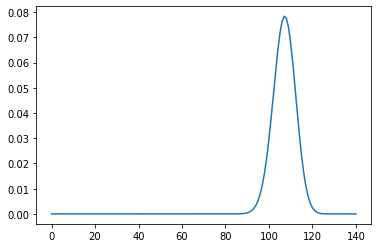

In [4]:
theta = np.arange(0,141)
N1 = 141
X = 107
likelihood = stats.binom.pmf(theta,141,107/141)
plt.plot(theta,likelihood)

Parameters:
n = the number of patients monitored
x = the probability of condition improving

## Prior

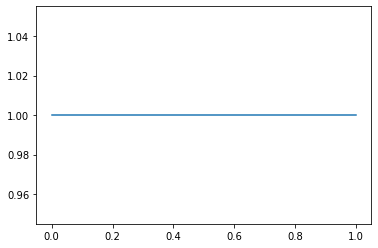

In [5]:
# conjugate is beta
# assuming no knowledge, flat prior
a = 1
b = 1
xb = np.linspace(0,1,141)
prior = stats.beta.pdf(xb,a,b)
plt.plot(xb,prior)

# Posterior


In [6]:
import scipy

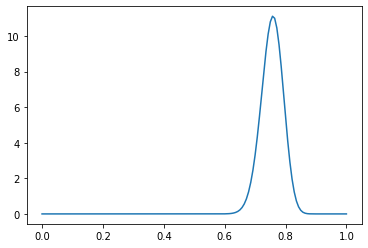

In [7]:
posterior = stats.beta.pdf(xb,a+X,b+N1-X)
plt.plot(xb,posterior)

Because my prior is flat, the posterior takes on the shape of the likelihood (equal weighting)


The posterior describes that the probability of successful treatment has a 95% confidence interval of approximately 0.65 to 0.8 and is fairly symmetrically distributed

## Task 2: Questions, predictions, and decisions
1. Posterior predictive distribution: Use your model to predict how many patients would improve if we treated 100 new eczema patients using SIT. Express your answer as a probability distribution over the number of patients improved.
2. Use your posterior to answer these questions:
    1. What is the probability that at least two thirds of eczema patients get better with SIT?
    2. What is the probability that at least 75% of eczema patients get better with SIT?
3. Use your model to decide whether the treatment works or not. Motivate your answer.

In [14]:
from scipy.special import comb

def betabinom(N2,X,a,b):
    #f(k|n,a,b) = comb(n,k) * B(k+a, n-k+b) / B(a,b)
    return(comb(N2,X) * stats.beta(X+a,N2-X+b)/stats.beta(a,b))



In [19]:
stats.beta(1,1)

In [12]:
N2 = 100
a = 1
b = 1
post_pred = []
for i in range(1,N2+1):
    post_pred.append(betabinom(N2,i,a,b))

TypeError: unsupported operand type(s) for *: 'float' and 'rv_frozen'

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

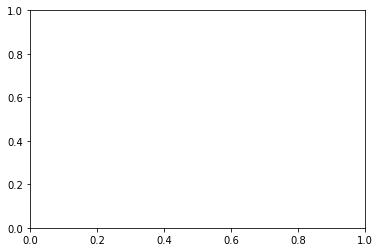

In [13]:
plt.plot(np.arange(1,N2+1),post_pred)

In [1]:
## it dOESN'T LOOK RIGHT but nevermind

The 95% confidence interval is approximately 40 to 60 patients

2/3rds get better: looks like around 5%
75%: looks like around 0.01% 

Looks like it doesn't work

but my posterior predictive is definitely wrong